DS12 階層型クラスタリングにおける ward法 の挙動を確認

In [4]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

* 階層型クラスタリングをward法で実施した場合のクラスターの併合順を確認するためのサンプルコードです
* 散布図のようにデータを配置したところから、クラスタリングを開始します

(7, 2)


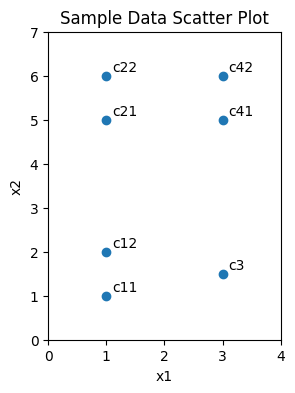

In [5]:
# irisデータ(csv形式)から読み込んでデータフレームを作成
sample_df = pd.DataFrame({
    'x1': [1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0],
    'x2': [1.0, 2.0, 5.0, 6.0, 1.5, 5.0, 6.0],
})
sample_df_labels = ['c11', 'c12', 'c21', 'c22', 'c3', 'c41', 'c42']
print(sample_df.shape)
# 散布図を表示
plt.figure(figsize=(3, 4))
plt.scatter(sample_df['x1'], sample_df['x2'])
plt.xlabel('x1')
plt.xlim(0, 4)
plt.ylabel('x2')
plt.ylim(0, 7)
plt.title('Sample Data Scatter Plot')
for i, label in enumerate(sample_df_labels):
    plt.text(sample_df['x1'][i]+0.1, sample_df['x2'][i]+0.1, sample_df_labels[i])
plt.show()

* 上のデータを階層型クラスタリングした結果です。
* クラスター(C12,C13)とクラスター(C3)、クラスター(C41,C42)とクラスター(C21,C22)の重心間の距離は同じですが、二つのクラスターの分散の和が小さいクラスター(C12,C13)とクラスター(C3)が先に併合されていることが確認できます。

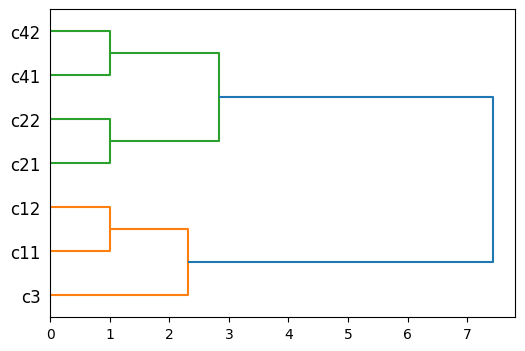

In [6]:
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(sample_df, metric='euclidean')
# クラスターを統合 (ward法)
linkage = hierarchy.linkage(dist, method='ward', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(6,4))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=sample_df_labels)

In [11]:
# 階層型クラスタリングで利用したサンプルデータ間の距離を表示
print('Hierarchical Clustering : distance between samples')
print(dist)
for i in range(len(dist)):
    print(f"Distance between {sample_df_labels[i // (len(sample_df_labels) - 1)]} and {sample_df_labels[i % (len(sample_df_labels) - 1)]}: {dist[i]}")

Hierarchical Clustering : distance between samples
[1.         4.         5.         2.06155281 4.47213595 5.38516481
 3.         4.         2.06155281 3.60555128 4.47213595 1.
 4.03112887 2.         2.23606798 4.9244289  2.23606798 2.
 3.5        4.5        1.        ]
Distance between c11 and c11: 1.0
Distance between c11 and c12: 4.0
Distance between c11 and c21: 5.0
Distance between c11 and c22: 2.0615528128088303
Distance between c11 and c3: 4.47213595499958
Distance between c11 and c41: 5.385164807134504
Distance between c12 and c11: 3.0
Distance between c12 and c12: 4.0
Distance between c12 and c21: 2.0615528128088303
Distance between c12 and c22: 3.605551275463989
Distance between c12 and c3: 4.47213595499958
Distance between c12 and c41: 1.0
Distance between c21 and c11: 4.031128874149275
Distance between c21 and c12: 2.0
Distance between c21 and c21: 2.23606797749979
Distance between c21 and c22: 4.924428900898052
Distance between c21 and c3: 2.23606797749979
Distance between

In [ ]:
# 階層型クラスタリングで利用したサンプルデータ間の距離を表示
print('Hierarchical Clustering : linkage matrix')
print(linkage)
_sample_df_labels = sample_df_labels
for c1, c2, dist, num_samples in linkage:
    print(f"Linkage between {_sample_df_labels[int(c1)]} and {_sample_df_labels[int(c2)]}: distance={dist}, num_samples={num_samples}")
    # 併合されたクラスターのラベルを追加 ( c1, c2 -> (c1,c2) )
    _sample_df_labels.append(f"({_sample_df_labels[int(c1)]},{_sample_df_labels[int(c2)]})")


Hierarchical Clustering : linkage matrix
[[ 0.          1.          1.          2.        ]
 [ 2.          3.          1.          2.        ]
 [ 5.          6.          1.          2.        ]
 [ 4.          7.          2.30940108  3.        ]
 [ 8.          9.          2.82842712  4.        ]
 [10.         11.          7.43223353  7.        ]]
Linkage between c11 and c12: distance=1.0, num_samples=2.0
Linkage between c21 and c22: distance=1.0, num_samples=2.0
Linkage between c41 and c42: distance=1.0, num_samples=2.0
Linkage between c3 and (c11,c12): distance=2.3094010767585034, num_samples=3.0
Linkage between (c21,c22) and (c41,c42): distance=2.8284271247461903, num_samples=4.0
Linkage between (c3,(c11,c12)) and ((c21,c22),(c41,c42)): distance=7.4322335295720645, num_samples=7.0
